In [ ]:
import numpy as np
from skimage.feature import hog
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train/255
x_test=x_test/255

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


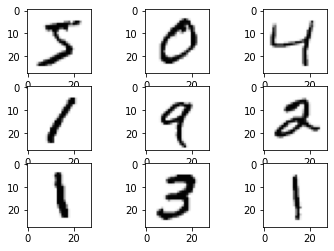

In [ ]:
plt.subplot(330 + 1 )
for i in range(9):
    img = x_train[i].reshape((28,28))
    plt.subplot(330 + 1+i  )
    plt.imshow(img, cmap="Greys")
plt.show()

#Assignment

In [ ]:
def features_extraction(array,n):
  features_all=np.zeros((n,32))
  counter_all=0
  for image in array:
    matrices=np.empty((16, 7, 7))
    matrix=image
    x_1 =0
    x_2 = 7
    i=0
    while i<16:
      matrices[i]=matrix[x_1:x_2,0:7]
      i +=1
      matrices[i]=matrix[x_1:x_2,7:14]
      i +=1
      matrices[i]=matrix[x_1:x_2,14:21]
      i +=1
      matrices[i]=matrix[x_1:x_2:,21:]
      i +=1
      x_1 +=7
      x_2 +=7

    features=np.zeros((32))
    counter=0
    for matrix in matrices:
      sum_x=0
      sum_y=0
      for i in range(7):
        for j in range(7):
          sum_x +=matrix[i][j]*i
          sum_y +=matrix[i][j]*j 

      center_y= sum_y/sum(sum(matrix))
      center_x=sum_x/sum(sum(matrix))
      features[counter]=center_x
      counter +=1
      features[counter]=center_y
      counter +=1
      features[np.isnan(features)]=0
    features_all[counter_all]=features
    counter_all +=1
  return features_all

In [ ]:
features_train=features_extraction(x_train,x_train.shape[0])
features_test=features_extraction(x_test,x_test.shape[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
features_train.shape

(60000, 32)

In [ ]:
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

In [ ]:
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [ ]:
x_train2,x_valid,y_train2,y_valid = train_test_split(features_train,y_train,test_size=0.1)

In [ ]:
features_train[:200].shape

(200, 32)

In [ ]:
pred=predict(features_train,y_train,features_test[:100],1)

In [ ]:
print(pred)
print(list(y_test[:100]))

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 9, 6, 4, 3, 0, 7, 0, 2, 1, 1, 7, 3, 2, 9, 7, 7, 0, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 9, 1, 7, 6, 9]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]


In [ ]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train2,y_train2)
model.score(x_valid,y_valid)

0.9061666666666667

In [ ]:
model.score(features_test,y_test)

0.9052

In [ ]:
predictions=model.predict(features_test)

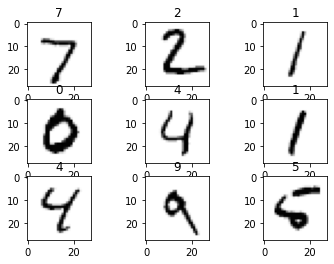

In [ ]:
for i in range(9):
    img = x_test[i].reshape((28,28))
    plt.subplot(330 + 1 + i)
    plt.imshow(img, cmap="Greys")
    plt.title(predictions[i])
plt.show()

# Easy way to extract features from data but it take  16 min to run KNN classifier 

In [ ]:
data_train=x_train.reshape(60000,(28*28))
data_test=x_test.reshape(10000,(28*28))

In [ ]:
data_train=pd.DataFrame(data_train)
data_test=pd.DataFrame(data_test)
x_train2,x_valid,y_train2,y_valid = train_test_split(data_train,y_train,test_size=0.1)

In [ ]:
x_train2.shape

(54000, 784)

In [ ]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train2,y_train2)
model.score(x_valid,y_valid)

0.966

In [ ]:
predictions=model.predict(data_test)

In [ ]:
model.score(data_test,y_test)

0.9648

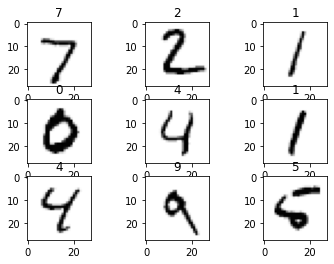

In [ ]:
for i in range(9):
    img = x_test[i].reshape((28,28))
    plt.subplot(330 + 1 + i)
    plt.imshow(img, cmap="Greys")
    plt.title(predictions[i])
plt.show()